This notebook explores the data model used for pointing radar data in the Python ARM Radar Toolkit (Py-ART). We will do this by loading a radar file from CF-Radial from ARM's X-Band system in the North Slope of Alaska Barrow site.

Go fetch the data from <a href = 'https://engineering.arm.gov/~jhelmus/sample_xsapr_a1_files/2013_12_03_NSA/nsaxsaprrhiC1.a1/nsaxsaprrhiC1.a1.20131203.141936.nc'> HERE </a> and place it in the same directory as this notebook.  If you save the file elsewhere adjust the *data_dir* variable to point to the correct directory.

In [1]:
#first import!
import pyart
import ARTview
from matplotlib import pyplot as plt
%matplotlib inline
data_dir = '/Users/bdolan/Desktop/PyArt_testing/'
filename = 'nsaxsaprrhiC1.a1.20131203.141936.nc'
fqfn = data_dir + filename

Read the CF-Radial file into Py-ART's data model for pointing gated data

In [2]:
radar = pyart.io.read(fqfn)

Lets investigate what is at the top level with a dir() command 

In [3]:
dir(radar)

['__doc__',
 '__init__',
 '__module__',
 '_dic_info',
 'add_field',
 'add_field_like',
 'altitude',
 'altitude_agl',
 'antenna_transition',
 'azimuth',
 'elevation',
 'extract_sweeps',
 'fields',
 'fixed_angle',
 'info',
 'instrument_parameters',
 'latitude',
 'longitude',
 'metadata',
 'ngates',
 'nrays',
 'nsweeps',
 'radar_calibration',
 'range',
 'scan_rate',
 'scan_type',
 'sweep_end_ray_index',
 'sweep_mode',
 'sweep_number',
 'sweep_start_ray_index',
 'target_scan_rate',
 'time']

Anything in the data model which contains array-like data is a dictionary with metadata and the actual data contained in the 'data' key, for example the array which contains information about the elevation angle of the sensor. 

In [11]:
radar.azimuth.keys()

# Can tab to fill and see what is available (after .)
#Keys is a method that is availalbe (again, tab after . to see what methods are available)

[u'comment', u'long_name', u'standard_name', u'units', 'data', u'axis']

In [13]:
radar.azimuth['standard_name']

u'beam_azimuth_angle'

In [20]:
radar.azimuth['data']

array([  96.88842773,   96.88842773,   96.88842773, ...,  186.43798828,
        186.43798828,  186.43798828], dtype=float32)

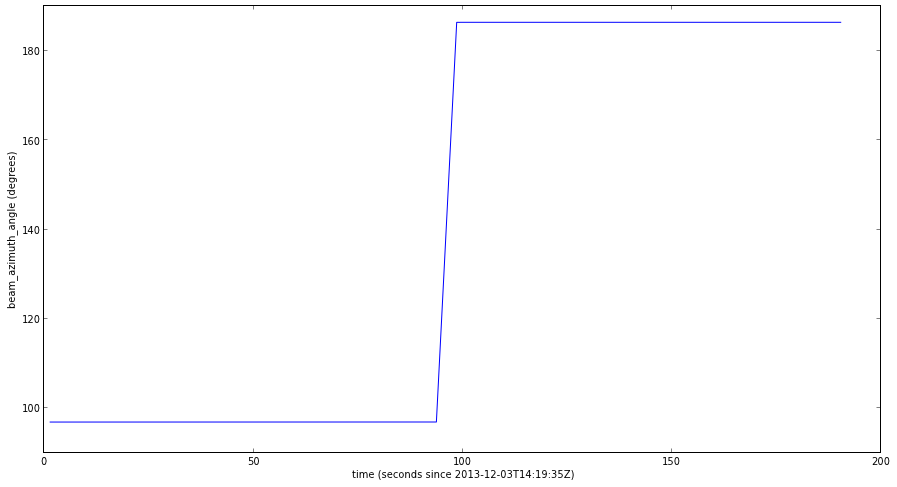

In [18]:
f = plt.figure(figsize=[15,8])
plt.plot(radar.time['data'], radar.azimuth['data'] )
plt.xlabel(radar.time['standard_name'] + ' (' + radar.time['units'] + ')')
plt.ylabel(radar.azimuth['standard_name'] + ' (' + radar.azimuth['units'] + ')')

In [21]:
a = range(10)
print a
for i in a:
    print i

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
1
2
3
4
5
6
7
8
9


0.0 39950.0 meters


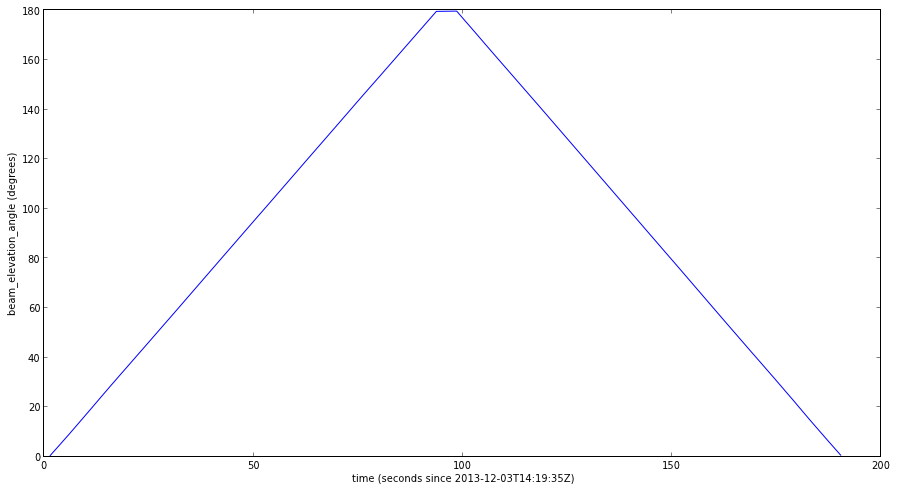

In [19]:
print radar.range['data'].min(), radar.range['data'].max(), radar.range['units']
f = plt.figure(figsize=[15,8])
plt.plot(radar.time['data'], radar.elevation['data'] )
plt.xlabel(radar.time['standard_name'] + ' (' + radar.time['units'] + ')')
plt.ylabel(radar.elevation['standard_name'] + ' (' + radar.elevation['units'] + ')')

So all the pointing data is contained in the base object, the azimuth and elevation of the antenna/sensor plus the range and time axes

there is also a swag of metadata contained within, well.. the metadata dictionary

In [23]:
for mykey in radar.metadata.keys():
    print mykey, ': ', radar.metadata[mykey]

comment :  Data in this file has not be calibrated, corrected, or had any quality control performed, use with caution.
instrument_type :  radar
site_id :  nsa
references :  http://radar.arm.gov/ARM_Radars/XSAPR.html
volume_number :  0
process_version :  $
title :  Atmospheric Radiation Measurement (ARM) program X-band Scanning ARM Precipitation Radar (XSAPR) raw moments
command_line :  xsapr_ingest -s nsa -f C1
source :  Atmospheric Radiation Measurement (ARM) program X-band Scanning ARM Precipitation Radar (XSAPR)
instrument_name :  xsapr-nsar1
platform_is_mobile :  false
data_level :  a1
datastream :  nsaxsaprrhiC1.a1
facility_id :  C1
institution :  United States Department of Energy - Atmospheric Radiation Measurement (ARM) program
n_gates_vary :  false
primary_axis :  axis_z
dod_version :  xsaprrhi-a1-1.2
Conventions :  CF/Radial instrument_parameters
platform_id :  xsaprrhi
platform_type :  fixed
location_description :  North Slope of Alaska (NSA), Barrow, Alaska
input_source :  

Now the final top level bit of information, the data model we use follows CF-Radial morphology and hence has a set of "helper" fields to format out the radar coverage pattern. That is, to seperate sweeps.

In [26]:
print radar.sweep_end_ray_index['data']

[ 597 1195]


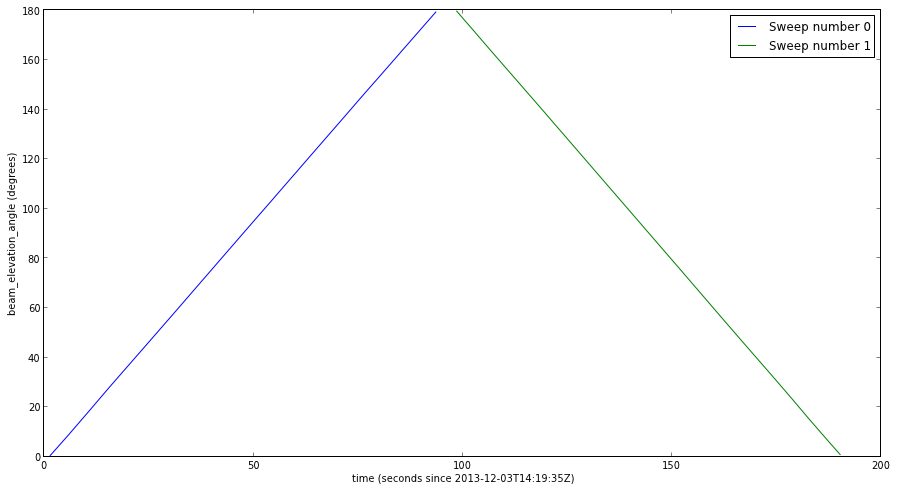

In [27]:
radar.sweep_end_ray_index['data']
f = plt.figure(figsize=[15,8])
for i in range(len(radar.sweep_end_ray_index['data'])):
    start_index = radar.sweep_start_ray_index['data'][i]
    end_index = radar.sweep_end_ray_index['data'][i]
    plt.plot(radar.time['data'][start_index:end_index], 
             radar.elevation['data'][start_index:end_index], 
             label = 'Sweep number '+ str(radar.sweep_number['data'][i]))
plt.legend()
plt.xlabel(radar.time['standard_name'] + ' (' + radar.time['units'] + ')')
plt.ylabel(radar.elevation['standard_name'] + ' (' + radar.elevation['units'] + ')')

Now to the actual data, or what ARM would call Primary Measurements. This is all stored in the field field of the radar object and is a dictionary of dictionaries. Best shown by example:

In [29]:
print radar.fields.keys() # Fields is where all the moment data resides
print ""
for mykey in radar.fields.keys():
    print mykey,':', radar.fields[mykey]['standard_name'] + ' (' + radar.fields[mykey]['units'] + ')'

[u'reflectivity_horizontal', u'cross_correlation_ratio', u'normalized_coherent_power', u'total_power', u'mean_doppler_velocity', u'doppler_spectrum_width', u'differential_reflectivity', u'specific_differential_phase', u'differential_phase']

reflectivity_horizontal : equivalent_reflectivity_factor (dBZ)
cross_correlation_ratio : cross_correlation_ratio_hv (unitless)
normalized_coherent_power : normalized_coherent_power (unitless)
total_power : equivalent_reflectivity_factor (dBZ)
mean_doppler_velocity : radial_velocity_of_scatters_away_from_instrument (meters_per_second)
doppler_spectrum_width : doppler_spectrum_width (meters_per_second)
differential_reflectivity : log_differential_reflectivity_hv (dB)
specific_differential_phase : specific_differential_phase_hv (degrees_per_km)
differential_phase : differential_phase_hv (degrees)


As far as CF-Radial ingest and write is concerned the variable names correspond to the variable names, the non-array data to the variable attributes and the 'data' key to the array.. lets look at some data

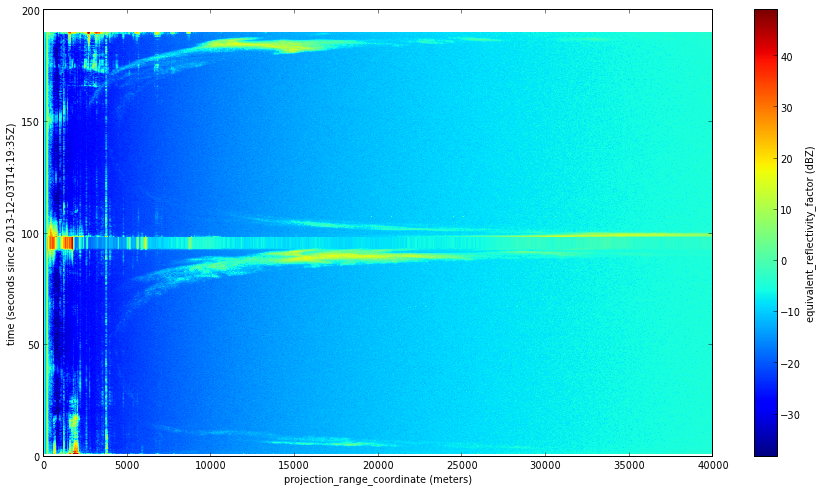

In [31]:
f = plt.figure(figsize=[15,8])
my_pc = plt.pcolormesh(radar.range['data'], radar.time['data'],
                       radar.fields['reflectivity_horizontal']['data'])
plt.xlabel(radar.range['standard_name'] + ' (' + radar.range['units'] + ')')
plt.ylabel(radar.time['standard_name'] + ' (' + radar.time['units'] + ')')
cb = plt.colorbar(mappable = my_pc)
cb.set_label(radar.fields['reflectivity_horizontal']['standard_name'] +\
             ' (' + radar.fields['reflectivity_horizontal']['units'] + ')')

And of course we can use our sweep indicators to isolate a single sweep

In [34]:
print radar.fields['reflectivity_horizontal']['data'].shape

(1196, 800)


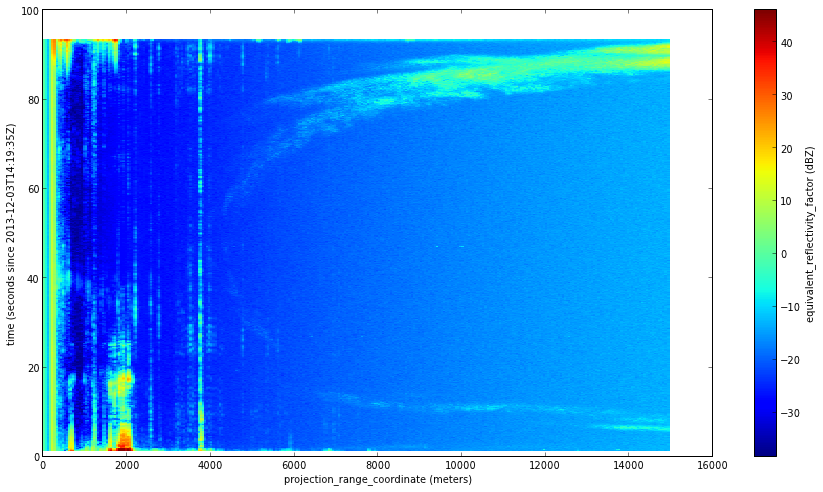

In [37]:
f = plt.figure(figsize=[15,8])
start_index = radar.sweep_start_ray_index['data'][0]
end_index = radar.sweep_end_ray_index['data'][0]
my_pc = plt.pcolormesh(radar.range['data'][0:300], radar.time['data'][start_index:end_index],
                       radar.fields['reflectivity_horizontal']['data'][start_index:end_index, 0:300])
plt.xlabel(radar.range['standard_name'] + ' (' + radar.range['units'] + ')')
plt.ylabel(radar.time['standard_name'] + ' (' + radar.time['units'] + ')')
cb = plt.colorbar(mappable = my_pc)
cb.set_label(radar.fields['reflectivity_horizontal']['standard_name'] +\
             ' (' + radar.fields['reflectivity_horizontal']['units'] + ')')

In [ ]:
# plt.my_pc? <--can get help this way

We can get a quick overview of what is contained in the radar object using the **info** method.

In [21]:
radar.info('compact')   # see what happens with 'standard' or 'full'

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (1196,)>
elevation: <ndarray of type: float32 and shape: (1196,)>
fields:
	reflectivity_horizontal: <ndarray of type: float32 and shape: (1196, 800)>
	cross_correlation_ratio: <ndarray of type: float32 and shape: (1196, 800)>
	normalized_coherent_power: <ndarray of type: float32 and shape: (1196, 800)>
	total_power: <ndarray of type: float32 and shape: (1196, 800)>
	mean_doppler_velocity: <ndarray of type: float32 and shape: (1196, 800)>
	doppler_spectrum_width: <ndarray of type: float32 and shape: (1196, 800)>
	differential_reflectivity: <ndarray of type: float32 and shape: (1196, 800)>
	specific_differential_phase: <ndarray of type: float32 and shape: (1196, 800)>
	differential_phase: <ndarray of type: float32 and shape: (1196, 800)>
fixed_angle: <ndarray of type: float32 and shape: (2,)>
instrument_parameters:
	prt: <ndarray of type: float32 

This functionality is also available from the command line using the **radar_info** command.

In [24]:
!radar_info --compact nsaxsaprrhiC1.a1.20131203.141936.nc

Traceback (most recent call last):
  File "/Library/Frameworks/EPD64.framework/Versions/Current/bin/radar_info", line 60, in <module>
    radar = pyart.io.read(args.filename)
  File "/Library/Frameworks/EPD64.framework/Versions/7.3/lib/python2.7/site-packages/pyart/io/auto_read.py", line 75, in read
    filetype = determine_filetype(filename)
  File "/Library/Frameworks/EPD64.framework/Versions/7.3/lib/python2.7/site-packages/pyart/io/auto_read.py", line 148, in determine_filetype
    f = open(filename, 'rb')
IOError: [Errno 2] No such file or directory: 'nsaxsaprrhiC1.a1.20131203.141936.nc'


Thus concludes the intro! Py-ART, of course, can do all this for you including pretty PPIs etc.. but this gives an introduction to the data model we use.  Questions? Comments? Science Lead: <a href = 'mailto:scollis@anl.gov'> Scott Collis</a> Development lead: <a href = 'mailto:jhelmus@anl.gov'>Jonathan Helmus</a>.